<a href="https://colab.research.google.com/github/Priyo-prog/Artificial-Intelligence-Projects/blob/main/Emotion%20AI/emotion_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Emotion AI**

* Artificial Emotional Intelligence or Emotion AI is a branch of AI that allows computers to understand human non-verbal cues such as body language and facial expression.

* This case study is about building, training and deploying a system that automatically monitors people's emotions and expressions.

* There is a collection of 20000 facial images with their associated facial expression labels and around 2000 images with their facial key-point annotations.

* there will be two models combined :
  * A model to detect key facial points.
  * A model to detect the facial expression or emotions.



## Import Libraries and Packages

In [29]:
  import pandas as pd
  import numpy as np
  import os
  import PIL
  import seaborn as sns
  import pickle
  from PIL import *
  import cv2
  import tensorflow as tf
  from tensorflow import keras
  from tensorflow.keras.layers import Conv2D
  from tensorflow.keras.layers import MaxPool2D
  from tensorflow.keras.layers import Activation
  from tensorflow.keras.layers import BatchNormalization
  from tensorflow.keras.applications import DenseNet121
  from tensorflow.keras.models import Model, load_model
  from tensorflow.keras.initializers import glorot_uniform
  from tensorflow.keras.utils import plot_model
  from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
  from IPython.display import display
  from tensorflow.python.keras import *
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  from tensorflow.keras import layers, optimizers
  from tensorflow.keras.applications.resnet50 import ResNet50
  from tensorflow.keras.layers import *
  from tensorflow.keras import backend as K
  from keras import optimizers
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split
  from google.colab.patches import cv2_imshow

In [2]:
## file paths

file_path = '/content/drive/MyDrive/Artificial Intelligence Projects/Emotion AI/data.csv'


## Import the Dataset

In [3]:
## mount the google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Artificial Intelligence Projects/Emotion AI

/content/drive/MyDrive/Artificial Intelligence Projects/Emotion AI


In [5]:
# load facial key points data
keyfacial_df = pd.read_csv(file_path)
keyfacial_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [6]:
# Obtain relevant information about the dataframe
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [7]:
# Check if the null values exist in the dataframe
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [8]:
keyfacial_df['Image'].shape

(2140,)

The above shape shows that there is 1D array which contains all the pixels of the image, this is not desireable.

We need to reshape the last column, to make it in an image format.

We will make it **96 x 96** pixel format

In [9]:
# Since values for the image are given as space separated string, separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96,96)
keyfacial_df['Image'] = keyfacial_df.Image.apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape(96,96) )

In [10]:
# Obtain the shape of the image
keyfacial_df['Image'][0].shape

(96, 96)

In [11]:
keyfacial_df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [12]:
## Mini challenge 1
## obtain the average, minimum and maximum values for 'right_eye_center_x'
keyfacial_df['right_eye_center_x'].mean(), keyfacial_df['right_eye_center_x'].min(), keyfacial_df['right_eye_center_x'].max()

(29.640268564561495, 18.9226106286, 42.495171727)

## **Perform Image Visualization**

* Perform a random image from the dataset along with facial keypoints
* Image data is obtained from df['Image'] and plotted using plt.imshow
* 15 x and y coordinates for the corresponding image
* since x-coordinates are in even columns like 0,2,4,... and y-coordinates are in odd columns 1,3,5.. we access their value using **.loc** command, which gets the values for coordinates of the image based on the column it is refering to.

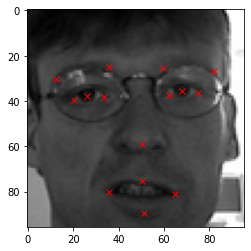

In [13]:
i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

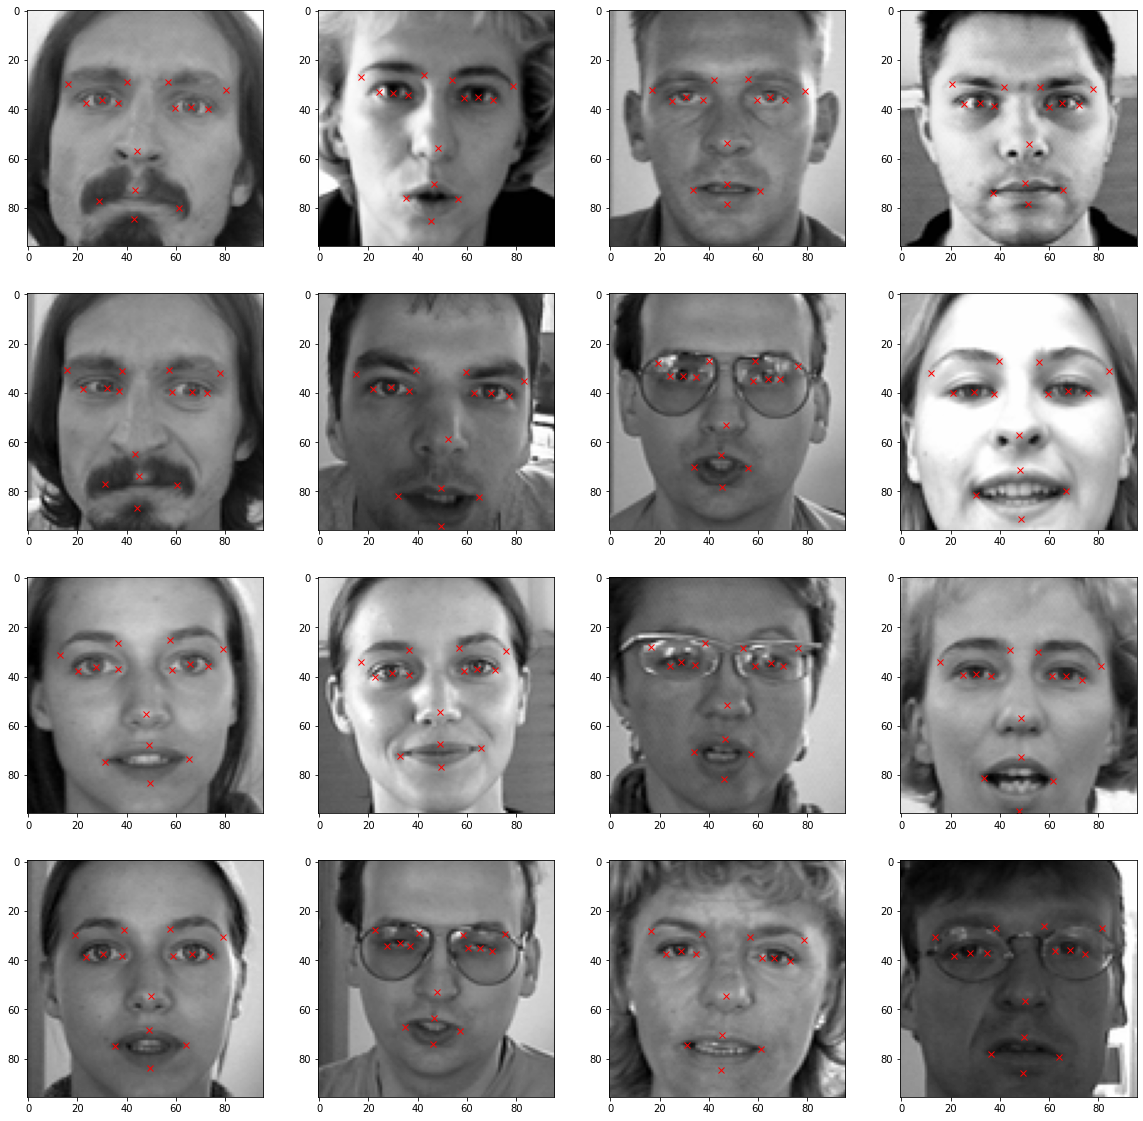

In [14]:
# Let's view some more images in grid format
fig = plt.figure(figsize=(20,20))

for i in range(16):
  ax = fig.add_subplot(4,4,i+1)
  image = plt.imshow(keyfacial_df['Image'][i], cmap='gray')
  for j in range(1,31,2):
    plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

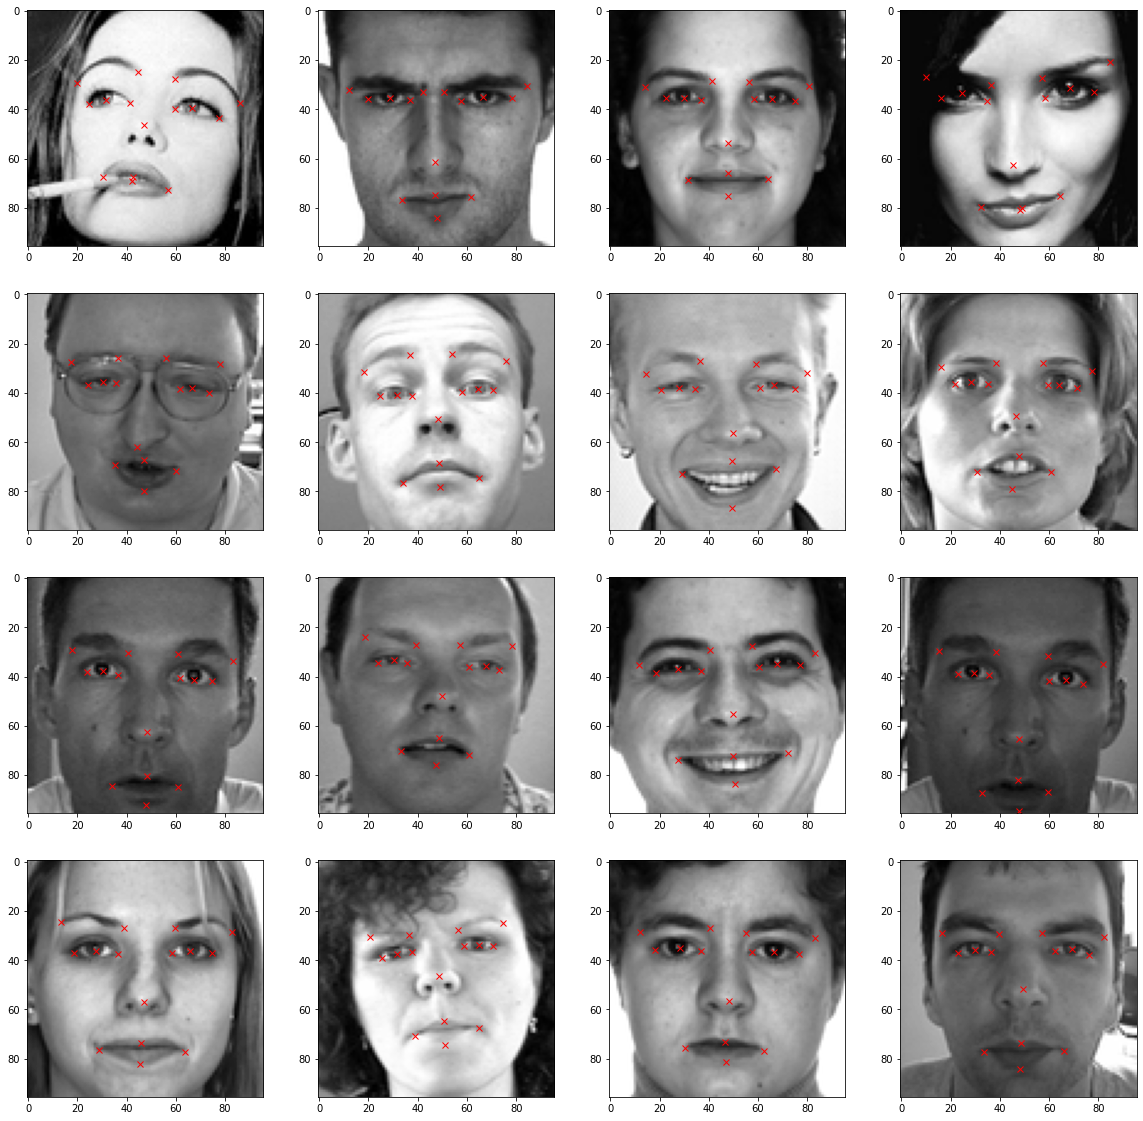

In [15]:
# get random 16 images
fig = plt.figure(figsize=(20,20))

for i in range(16):
  k = np.random.randint(1, len(keyfacial_df))
  ax = fig.add_subplot(4,4,i+1)
  image = plt.imshow(keyfacial_df['Image'][k], cmap='gray')
  for j in range(1,31,2):
    plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')

## **Perform Image Augmentation**

We can flip the image or zoom or make any modification of the image to increase the generalization capability of the model.



In [16]:
# Create a new copy of the dataframe
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [17]:
# Obtain the columns in the dataframe

columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [18]:
# Horizontal Flip - flip the images along the y axis
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis=1))

# Since we are flipping horizontally, y coordinate values will be the same
# Only x-coordinate values would change, all we have to do is subtract our 
# initial x-cooordinate values from width of the image
for i in range(len(columns)):
  if i%2 == 0:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x))    

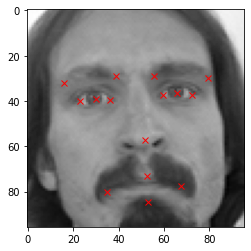

In [19]:
# Show the horizontal flipped image
plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [20]:
keyfacial_df.shape

(2140, 31)

In [21]:
# Concatenate the original dataframe with the augmented dataframe
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))
augmented_df.shape

(4280, 31)

In [22]:
# Randomingly increasing the brightness of the images
# We multiply pixel values by random values between 1.5 and 2 
# increase the brighness of the image

# We clip the value between 0 and 255

import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.clip(random.uniform(1.5,2) * x, 0.0, 255.0))
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))
augmented_df.shape

(4280, 31)

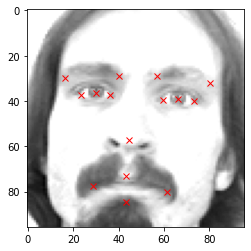

In [23]:
# Show image with increased brightness

plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1,31,2):
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

## **Perform Data Normalization and Training Data Preparation**

In [24]:
# Obtain the value of the images which is present in the 31st column (since index start from 0, we refer 31st column by 30)
img = augmented_df[:,30]

# Normalize the image
img = img / 255

# Create an empty array of shape (x,96,96,1) to feed the model
X = np.empty((len(img), 96,96,1))

# Iterate through the img list and add image values to the empty array after 
# expanding it's dimension from (96,96) to (96,96,1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis=2)

# convert the array type to float 32
X = np.asarray(X).astype(np.float32)
X.shape  

(4280, 96, 96, 1)

In [25]:
# Obtain the values of x & y coordinate which are to be used as target
y = augmented_df[:, :30]
y = np.asarray(y).astype(np.float32)
y.shape

(4280, 30)

In [26]:
# Split the data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

## **Build Deep Residual Neural Network Key facial Point Detection Model**

In [ ]:
"""
This is the Residual block which will contain 1 convolutional block and 2 identity block.
This is going to be the part of the final model
"""
def res_block(X, filter, stage):
  """
   CONVOLUTIONAL BLOCK - This block will contain: 
   1. Conv2D followed by Maxpool2D and BatchNormal, Relu
   2. Again  Conv2D, BatchNormal, Relu
   3. Again Conv2D and BatchNormal
   It will also have a short path to deal with vanishing gradient.
   Short Path will contain:
   1. Conv2D followed by MaxPool2D and BatchNorm
  """
  X_copy = X

  f1,f2,f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides=(1,1), name='res_'+str(stage)+'_conv_a', kernel_initializer=glorot_uniform(seed=0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis=3, name="bn_"+str(stage)+"_conv_a")(X)
  X = Activation("relu")(X)

  X = Conv2D(f2, kernel_size=(3,3), strides=(1,1), padding="same",
             name='res_'+str(stage)+'_conv_b', kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name="bn_"+str(stage)+"_conv_b")(X)
  X = Activation("relu")(X)

  X = Conv2D(f2, kernel_size=(1,1), strides=(1,1),
             name='res_'+str(stage)+'_conv_c', kernel_initializer=glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name="bn_"+str(stage)+"_conv_c")(X)


  # Short Path
  X_copy = Conv2D(
      f3, kernel_size=(1,1), strides=(1,1), name="res_"+str(stage)+"_conv_copy"
      kernel_initializer=glorot_uniform(seed=0))(X)




